In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 

In [20]:
df = pd.read_html('https://www.extremeweatherwatch.com/states/ohio/average-temperature-by-year')
df = df[0]

In [21]:
df

,Year,Rank,High (°F),Low (°F)
0,2021,5,63.0,43.3
1,2020,8,62.8,43.2
2,2019,14,62.4,42.4
3,2018,22,61.5,42.9
4,2017,5,63.3,43.2
...,...,...,...,...
122,1899,54,61.6,40.0
123,1898,37,61.4,41.4
124,1897,58,61.2,40.0
125,1896,50,60.7,41.1


In [27]:
df = df.rename(columns={df.columns[2] : 'High', df.columns[3] : 'Low'})
df

,Year,Rank,High,Low
0,2021,5,63.0,43.3
1,2020,8,62.8,43.2
2,2019,14,62.4,42.4
3,2018,22,61.5,42.9
4,2017,5,63.3,43.2
...,...,...,...,...
122,1899,54,61.6,40.0
123,1898,37,61.4,41.4
124,1897,58,61.2,40.0
125,1896,50,60.7,41.1


In [31]:
x = df['Year']
y1 = df['Low']
y2 = df['High']

Text(0.5, 1.0, 'Average High and Low Temperatures in Ohio from 1895-2021')

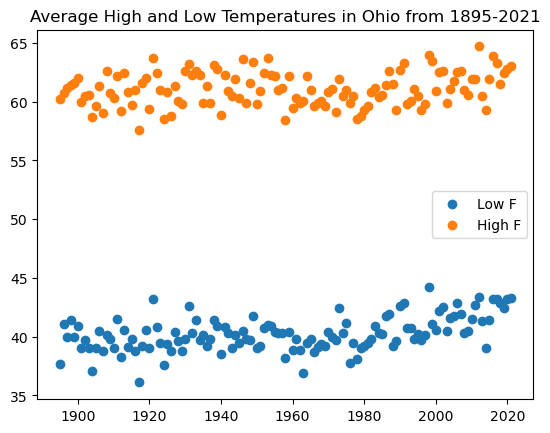

In [35]:
plt.scatter(x, y1)
plt.scatter(x, y2)
classes = ['Low F', 'High F']
plt. legend(labels = classes)
plt.title(label = 'Average High and Low Temperatures in Ohio from 1895-2021')

In [41]:
years_extended = np.arange(1895, 2050, 1)

In [42]:
linregLow = linregress(x, y1)
linregHigh = linregress(x, y2)
linregLow

LinregressResult(slope=0.019121437945256854, intercept=2.8366024559429803, rvalue=0.47518372840935585, pvalue=1.6521880141092368e-08, stderr=0.0031668732642274717, intercept_stderr=6.201824650311019)

In [43]:
bestFitLow = [linregLow.slope*xi + linregLow.intercept for xi in years_extended]
bestFitHigh = [linregHigh.slope*xi + linregHigh.intercept for xi in years_extended]

Text(0.5, 1.0, 'Average High and Low Temperatures in Ohio from 1895-2021')

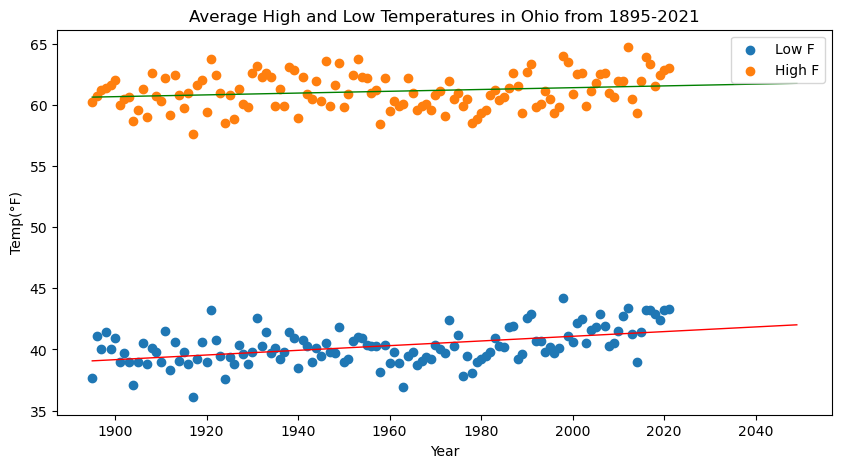

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y1)
ax.scatter(x, y2)
ax.plot(years_extended, bestFitLow, 'r', linewidth=1)
ax.plot(years_extended, bestFitHigh, 'g', linewidth=1)
classes = ['Low F', 'High F']
ax.legend(labels = classes)
ax.set_xlabel('Year')
ax.set_ylabel('Temp(°F)')
ax.set_title(label = 'Average High and Low Temperatures in Ohio from 1895-2021')